# Statistical Mechanics Final Project
## Name: 陳姿安     ID: 106022545

### 最近我國開出一種新的樂透方式，名為"雙贏彩"!!!
他標榜說如果平時怎麼簽樂透都不會中的人，可以試試這種玩法，
在這邊我為大家分析一下，
希望大家能好好評估，才不會花掉很多的冤枉錢。

遊戲方式是從24個號碼中選出12個號碼，

全沒中或者全部都中，則有1500萬的獎金!

中1個或者11個，獎金10萬元

中2個或者10個，獎金500元

中3個或者9個，獎金100元

以下我對他做了一些理論跟實驗上的分析，可以了解到他的中獎機率以及你的淨收益。

#### 1.理論分析

24個號碼的所有組合:  $C_{2}^{24}=2704156$ 

全中以及全不中的組合: $1+1=2$

中1個以及中11個的組合: $C_{11}^{12}\times C _{1}^{12}\times 2=288$

中2個以及中10個的組合: $C_{10}^{12}\times C _{2}^{12}\times 2=8712$

中3個以及中9個的組合: $C_{9}^{12}\times C _{3}^{12}\times 2=96800$

機率:

全中以及全不中: $7.4\times 10^{-5}\%$

中1個以及中11個: $0.01 \%$

中2個以及中10個: $0.32 \%$

中3個以及中9個: $3.58 \%$

摃龜: $96 \%$

以下是理論的計算程式...

In [52]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def C(N,q):
    return np.math.factorial(N)/(np.math.factorial(q)* np.math.factorial(N-q))

In [3]:
C(24,12)

2704156.0

In [34]:
def win_win(hits):
    return C(12, hits) * C(12, 12-hits) / C(24,12) * 100

In [73]:
print("{:^8}{:^10}".format('中獎個數', '機率(%)'))
for i in range(0,13):
    print("{:^10}{:^10.6f}".format(i, win_win(i)))

  中獎個數    機率(%)   
    0      0.000037 
    1      0.005325 
    2      0.161085 
    3      1.789838 
    4      9.061053 
    5     23.196295 
    6     31.572735 
    7     23.196295 
    8      9.061053 
    9      1.789838 
    10     0.161085 
    11     0.005325 
    12     0.000037 


### 2.期望值
期望值: $-23.065$

也就是說你平均買一張就會賠23元!!

In [58]:
expected_value=(((15000000-50)*win_win(0)+(100000-50)*win_win(1)+(500-50)*win_win(2)+(100-50)*win_win(3)-50*win_win(4)-50*win_win(5))*2-50*win_win(6))/100
print("expected_value=",expected_value)

expected_value= -23.065163400336377


### 3.模擬結果
先選定一組確定中獎的號碼，然後試很多次，也就是說買很多張，看甚麼時候會中獎。
以下我試了10萬次，分別得到中頭獎與其他獎的機率，並且畫了一張次數對淨收益的圖。

In [74]:
bingo = { 1, 3, 5, 8, 9, 13, 15, 17, 19, 20, 21, 24} # 選定的中獎號碼

In [67]:
bingos = [0, 0, 0, 0, 0]
trials = 100000
net_profit = 0
net_profits = []

for i in range(trials):
    selected = set(random.sample(range(1,25),12))
    hit_numbers = len(bingo & selected)
    if hit_numbers == 0 or hit_numbers == 12:
        bingos[0]+=1
        net_profit += 15000000-50
        net_profits.append(net_profit)
    elif hit_numbers == 1 or hit_numbers == 11:
        bingos[1]+=1
        net_profit += 100000-50
        net_profits.append(net_profit)
    elif hit_numbers == 2 or hit_numbers == 10:
        bingos[2]+=1
        net_profit += 500-50
        net_profits.append(net_profit)
    elif hit_numbers == 3 or hit_numbers == 9:
        bingos[3]+=1
        net_profit += 100-50
        net_profits.append(net_profit)
    else:
        bingos[4]+=1
        net_profit += -50
        net_profits.append(net_profit)

In [68]:
prob = [x / trials * 100 for x in bingos]

In [69]:
prob

[0.0, 0.016, 0.326, 3.599, 96.05900000000001]

In [70]:
for i in range(len(prob)):
    print(prob[i])

0.0
0.016
0.326
3.599
96.05900000000001


結果:

| 中頭獎機率 | 中1個或11個 | 中2個或10個 | 中3個或9個 |  中4~8個  |
|:----------:|:-----------:|:-----------:|:----------:|-----------|
|    0.0%    |    0.016%   |    0.326%   |   3.599%   |  96.059%  |

                                 由此可知，與理論值相符。

Text(0,0.5,'net profit (TWD)')

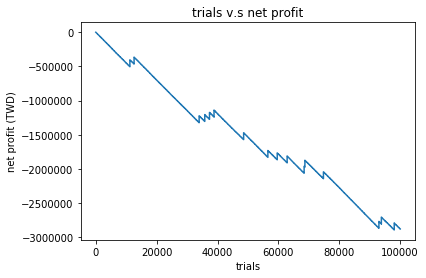

In [78]:
plt.plot(range(1, 100001), net_profits)
plt.title("trials v.s net profit") # 購買次數-淨收益圖
plt.xlabel("trials")
plt.ylabel("net profit (TWD)")

結果:
若是我們買了10萬張的彩卷，由這張圖可以看出，淨收益明顯往下滑，雖然會中獎，但還是明顯的賠錢。

若是運氣好時，會得出以下的圖:


Text(0,0.5,'net profit (TWD)')

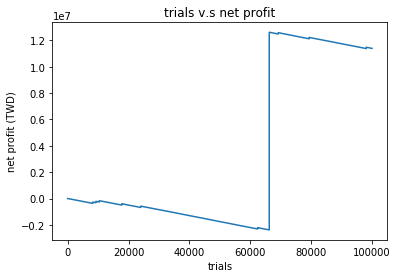

In [94]:
bingo = { 1, 3, 5, 8, 9, 13, 15, 17, 19, 20, 21, 24}
bingos = [0, 0, 0, 0, 0]
trials = 100000
net_profit = 0
net_profits = []

for i in range(trials):
    selected = set(random.sample(range(1,25),12))
    hit_numbers = len(bingo & selected)
    if hit_numbers == 0 or hit_numbers == 12:
        bingos[0]+=1
        net_profit += 15000000-50
        net_profits.append(net_profit)
    elif hit_numbers == 1 or hit_numbers == 11:
        bingos[1]+=1
        net_profit += 100000-50
        net_profits.append(net_profit)
    elif hit_numbers == 2 or hit_numbers == 10:
        bingos[2]+=1
        net_profit += 500-50
        net_profits.append(net_profit)
    elif hit_numbers == 3 or hit_numbers == 9:
        bingos[3]+=1
        net_profit += 100-50
        net_profits.append(net_profit)
    else:
        bingos[4]+=1
        net_profit += -50
        net_profits.append(net_profit)
plt.plot(range(1, 100001), net_profits)
plt.title("trials v.s net profit") # 購買次數-淨收益圖
plt.xlabel("trials")
plt.ylabel("net profit (TWD)")

結論:
由這一系列的分析，我們可以知道整體而言，中獎機率還是太小，所以奉勸大家不要被廣告噱頭給迷惑了，偶爾玩玩試試看可以，但千萬別想著靠它賺錢!!!